In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [4]:
# 파일 읽기
dogog_df = pd.read_csv("도곡로_통행속도_기상.csv", encoding='cp949')

# 결측치 확인
print('도곡로 결측치 수 : ',dogog_df['속도'].isna().sum())

도곡로 결측치 수 :  660


In [5]:
def fill_missing_values(df):
    # 일시 컬럼을 datetime 형식으로 변환
    df['일시'] = pd.to_datetime(df['일시'])
    
    # 시간 추출
    df['hour'] = df['일시'].dt.hour
    
    # 각 결측치에 대해
    null_indices = df[df['속도'].isnull()].index
    
    for idx in null_indices:
        current_row = df.loc[idx]
        
        # 현재 결측치의 조건과 동일한 데이터 필터링
        same_conditions = (
            (df['링크아이디'] == current_row['링크아이디']) & 
            (df['hour'] == current_row['hour']) & 
            (df['isHoliday'] == current_row['isHoliday']) &
            (df['속도'].notnull())  # 결측치가 아닌 데이터만
        )
        
        # 조건에 맞는 평균 속도 계산
        mean_speed = df[same_conditions]['속도'].mean()
        
        # 만약 조건에 맞는 데이터가 없다면 (mean_speed가 NaN이라면)
        # 휴일 조건을 제외하고 다시 계산
        if pd.isna(mean_speed):
            same_conditions = (
                (df['링크아이디'] == current_row['링크아이디']) & 
                (df['hour'] == current_row['hour']) &
                (df['속도'].notnull())
            )
            mean_speed = df[same_conditions]['속도'].mean()
        
        # 여전히 평균을 구할 수 없다면 전체 링크아이디의 해당 시간대 평균 사용
        if pd.isna(mean_speed):
            same_conditions = (
                (df['hour'] == current_row['hour']) &
                (df['속도'].notnull())
            )
            mean_speed = df[same_conditions]['속도'].mean()
        
        # 결측치 채우기
        df.loc[idx, '속도'] = mean_speed
        
    return df

# 사용
dogog_df = fill_missing_values(dogog_df.copy())
print('도곡로 결측치 수 : ',dogog_df['속도'].isna().sum())

도곡로 결측치 수 :  0


In [6]:
dogog_df.drop(columns = ['일자', '요일', '도로명', '시점명', '종점명', '방향', '기능유형구분', '도심/외곽구분', '시간','지점', '지점명', 'dateName', 'seq', 'dateKind'], inplace = True)

In [7]:
# 속도가 비어있는 행의 인덱스 출력
print("속도가 비어있는 행의 인덱스:")
print(dogog_df[dogog_df['속도'].isna()].index)

속도가 비어있는 행의 인덱스:
Index([], dtype='int64')


### 모델 학습


링크아이디 1220020800에 대한 분석


2025-02-15 18:42:12.411607: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 13ms/step


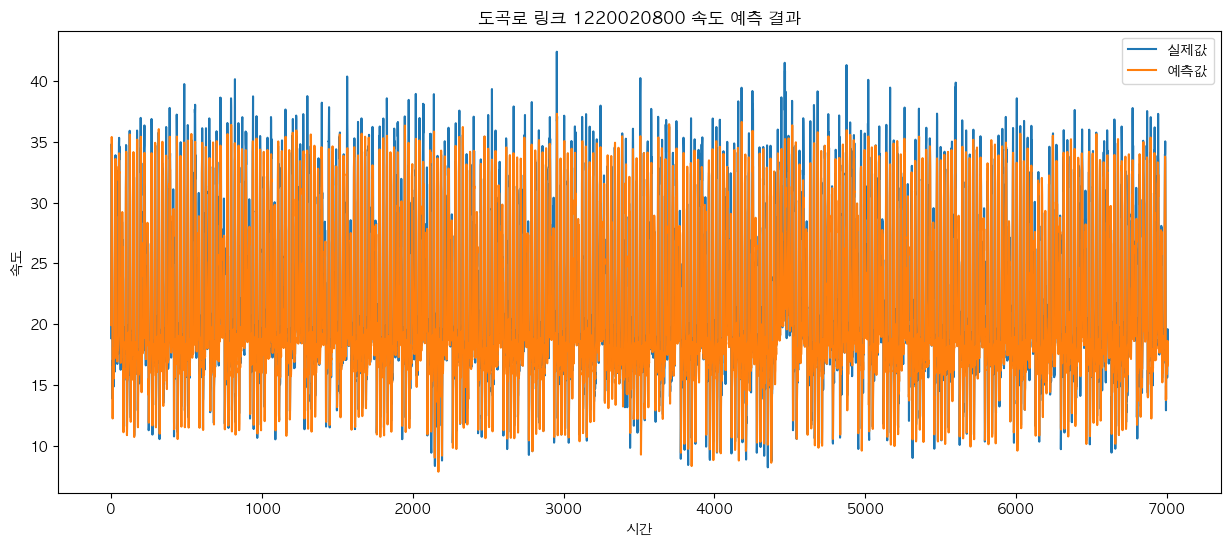

도곡로의 링크 1220020800 평가 결과:
Train RMSE: 2.315005048165054
Test RMSE: 1.9460100558928404
Train MAE: 1.623500505564255
Test MAE: 1.3909601354768668
Train R2: 0.907452126987301
Test R2: 0.9170553853336623
Train Adjusted R2: 0.9074488252437044
Test Adjusted R2: 0.917043546250781
--------------------------------------------------

링크아이디 1220016700에 대한 분석
1/1 [==============================] - 0s 12ms/step


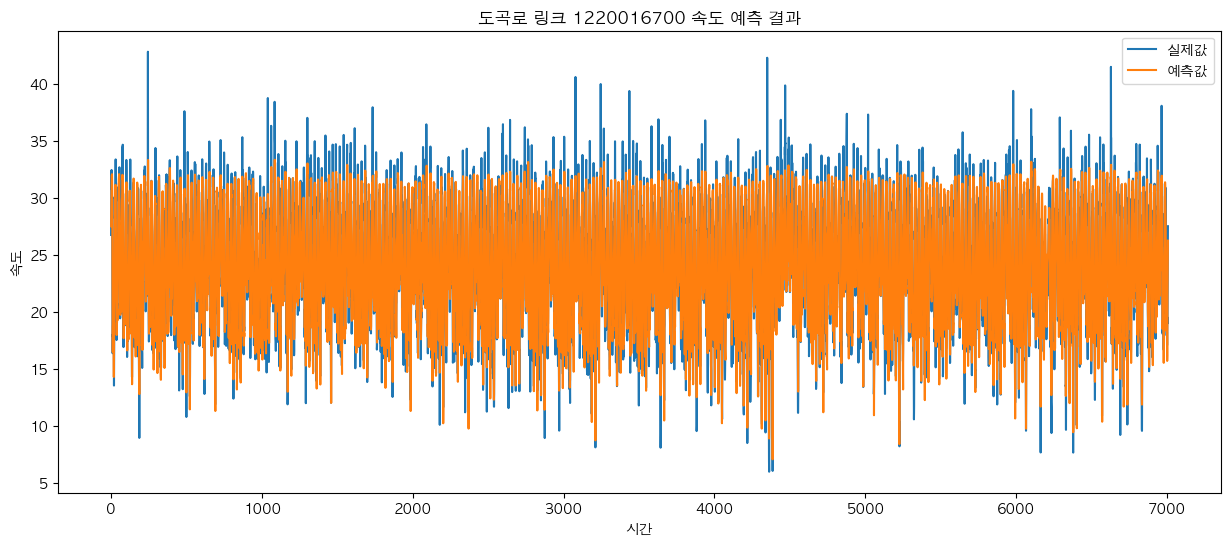

도곡로의 링크 1220016700 평가 결과:
Train RMSE: 2.321244915944473
Test RMSE: 2.0973097445237996
Train MAE: 1.7088334540116268
Test MAE: 1.5671330277131892
Train R2: 0.8554334607595997
Test R2: 0.857002194937586
Train Adjusted R2: 0.8554283031948747
Test Adjusted R2: 0.8569817841746596
--------------------------------------------------

링크아이디 1220015400에 대한 분석
1/1 [==============================] - 0s 13ms/step


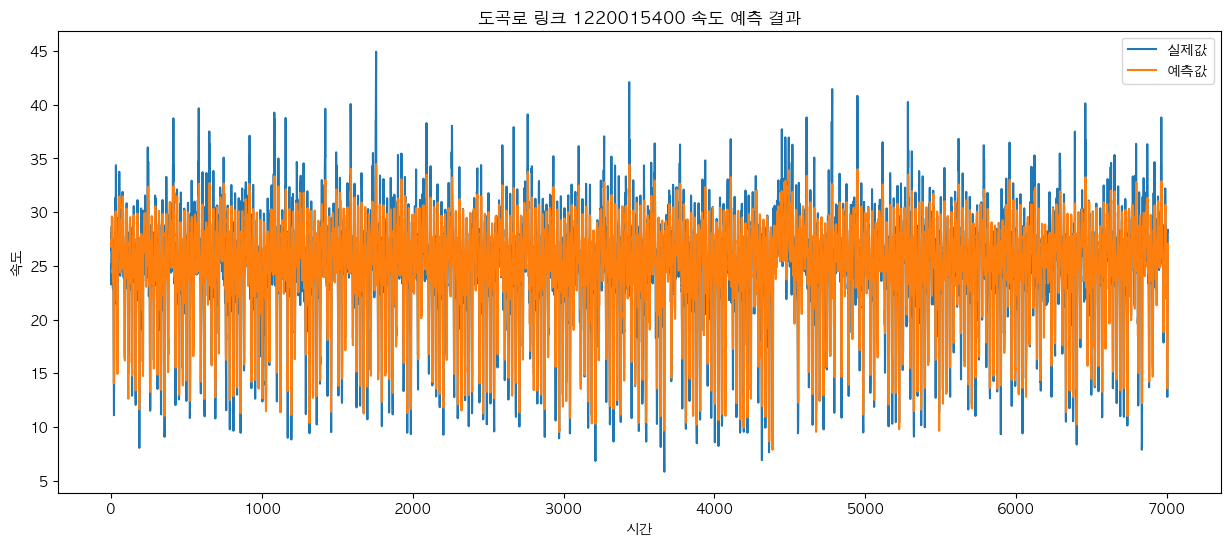

도곡로의 링크 1220015400 평가 결과:
Train RMSE: 2.2312442272249657
Test RMSE: 2.076303361227127
Train MAE: 1.675450544547866
Test MAE: 1.5912769637429303
Train R2: 0.7989181483374169
Test R2: 0.8280435888074903
Train Adjusted R2: 0.798910974528938
Test Adjusted R2: 0.828019044643746
--------------------------------------------------

링크아이디 1220016600에 대한 분석
1/1 [==============================] - 0s 12ms/step


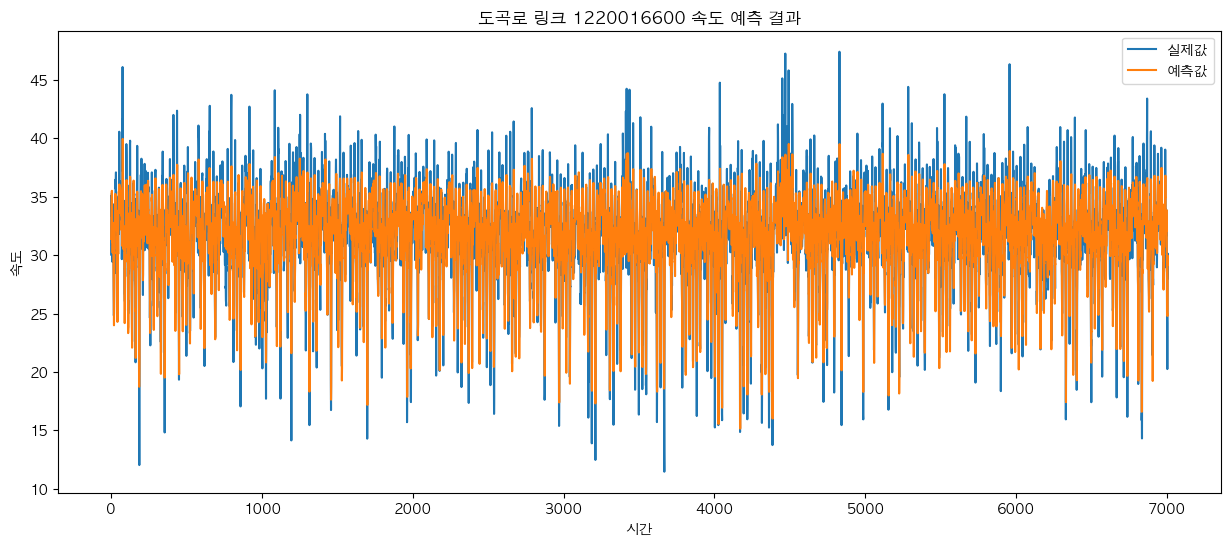

도곡로의 링크 1220016600 평가 결과:
Train RMSE: 2.2403845256960913
Test RMSE: 2.092545736782059
Train MAE: 1.6533282567147518
Test MAE: 1.561931905586484
Train R2: 0.7553753629509676
Test R2: 0.7356092524889607
Train Adjusted R2: 0.7553666357074054
Test Adjusted R2: 0.7355715147288249
--------------------------------------------------

링크아이디 1220019000에 대한 분석
1/1 [==============================] - 0s 11ms/step


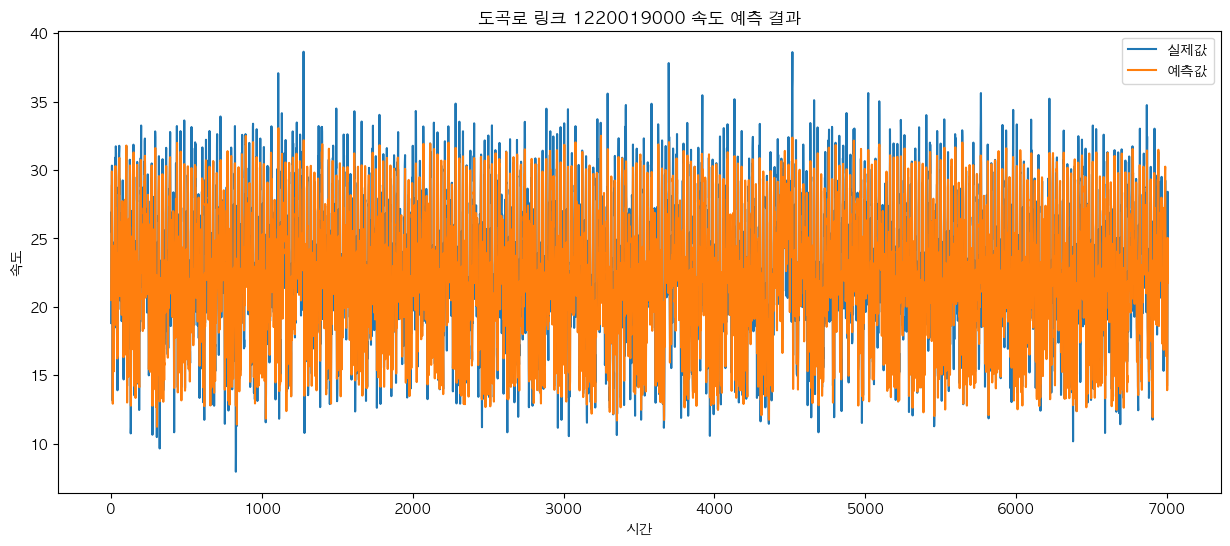

도곡로의 링크 1220019000 평가 결과:
Train RMSE: 2.0355720576766294
Test RMSE: 2.0435610994238425
Train MAE: 1.5522297556528204
Test MAE: 1.5762399383249133
Train R2: 0.8515072929558031
Test R2: 0.8315629801076732
Train Adjusted R2: 0.8515019953208747
Test Adjusted R2: 0.8315389382835379
--------------------------------------------------

링크아이디 1220022500에 대한 분석
1/1 [==============================] - 0s 11ms/step


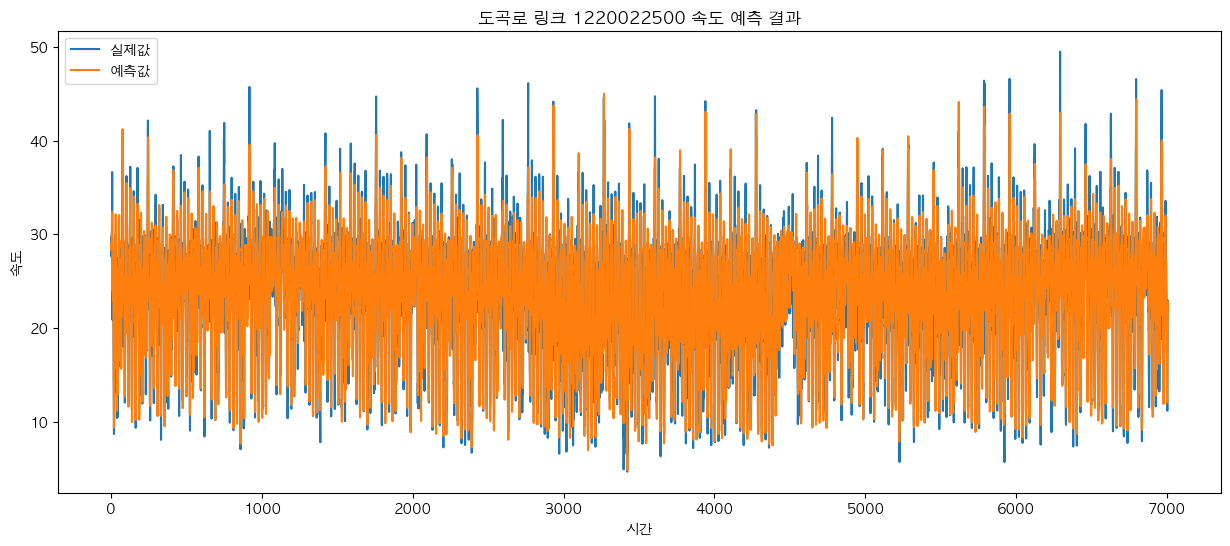

도곡로의 링크 1220022500 평가 결과:
Train RMSE: 2.077225225825737
Test RMSE: 2.158906632850725
Train MAE: 1.574225945128278
Test MAE: 1.6528155429204252
Train R2: 0.8992871670794587
Test R2: 0.8976126184739441
Train Adjusted R2: 0.8992835740422513
Test Adjusted R2: 0.897598004231648
--------------------------------------------------

링크아이디 1220024200에 대한 분석
1/1 [==============================] - 0s 12ms/step


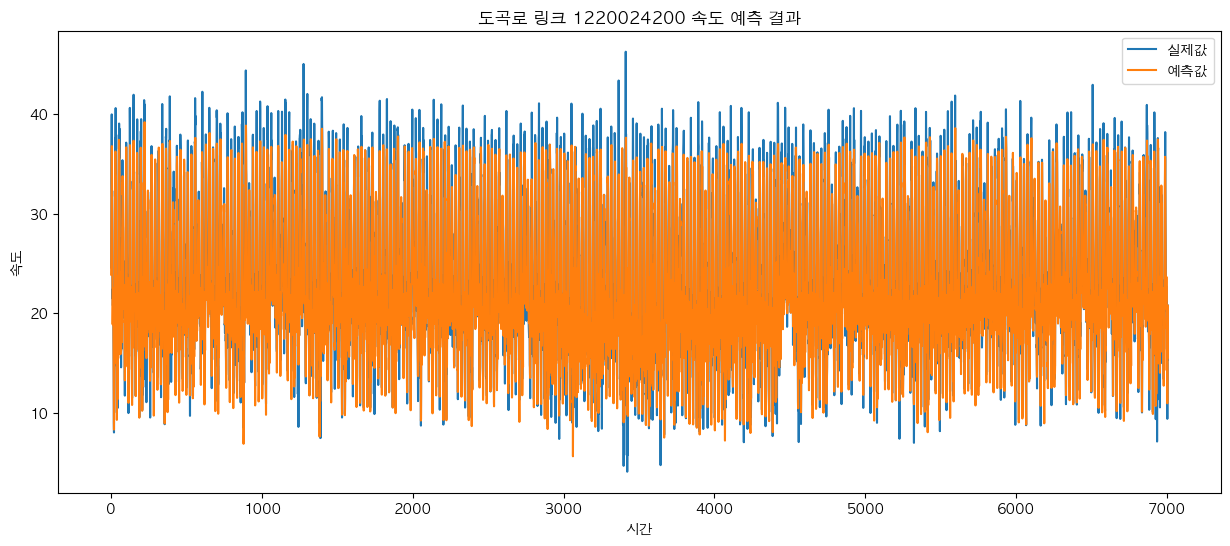

도곡로의 링크 1220024200 평가 결과:
Train RMSE: 2.2841587323693395
Test RMSE: 2.2227018494126436
Train MAE: 1.6945112749551765
Test MAE: 1.6908512139286416
Train R2: 0.9113407024628774
Test R2: 0.9135058157701724
Train Adjusted R2: 0.9113375394483381
Test Adjusted R2: 0.9134934700401939
--------------------------------------------------

링크아이디 1220024300에 대한 분석
1/1 [==============================] - 0s 10ms/step


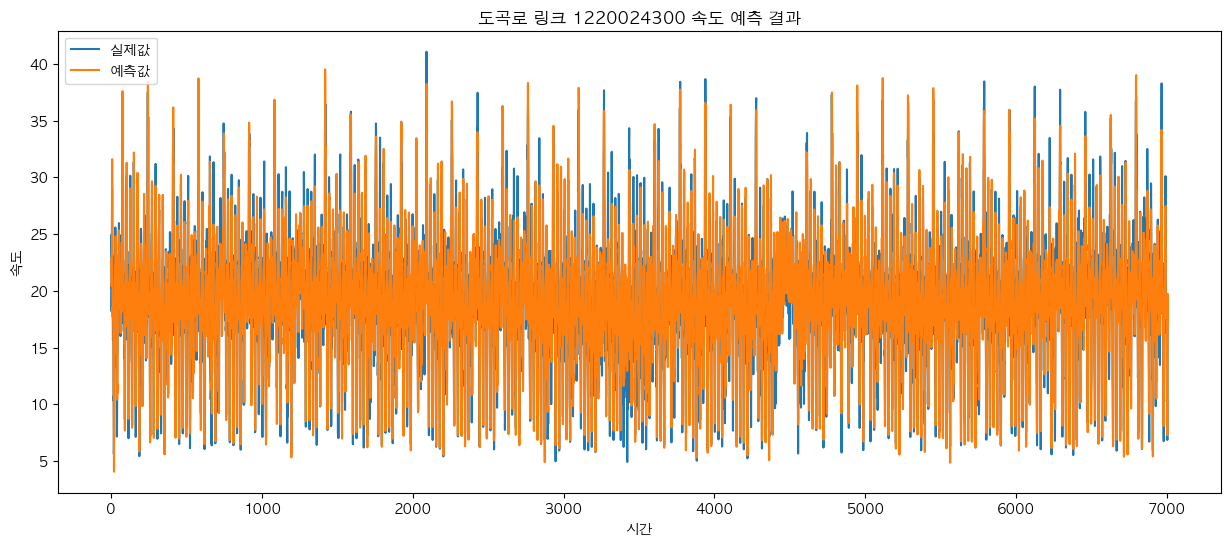

도곡로의 링크 1220024300 평가 결과:
Train RMSE: 2.2342614830991523
Test RMSE: 2.0945313517070807
Train MAE: 1.6605028459317455
Test MAE: 1.574511928242227
Train R2: 0.8487816035924732
Test R2: 0.8613437359161373
Train Adjusted R2: 0.8487762087156838
Test Adjusted R2: 0.8613239448421888
--------------------------------------------------

링크아이디 1220022600에 대한 분석
1/1 [==============================] - 0s 11ms/step


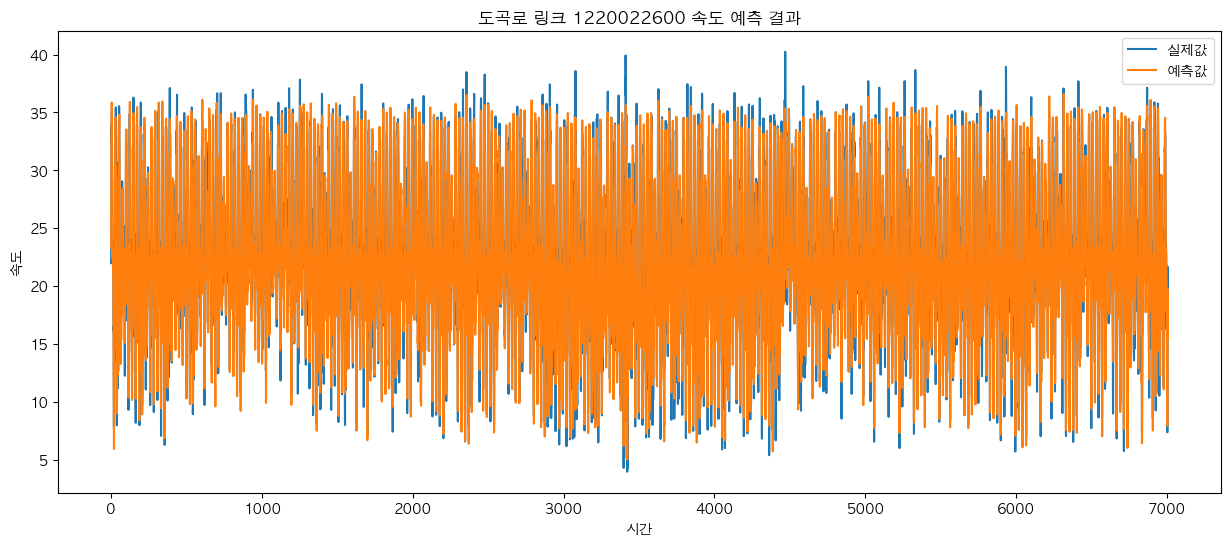

도곡로의 링크 1220022600 평가 결과:
Train RMSE: 2.0574308998212003
Test RMSE: 1.8252596229626394
Train MAE: 1.5516301676733364
Test MAE: 1.3765549411138636
Train R2: 0.9194208506128878
Test R2: 0.9250950286341159
Train Adjusted R2: 0.9194179758662097
Test Adjusted R2: 0.925084337088103
--------------------------------------------------

링크아이디 1220020900에 대한 분석
1/1 [==============================] - 0s 11ms/step


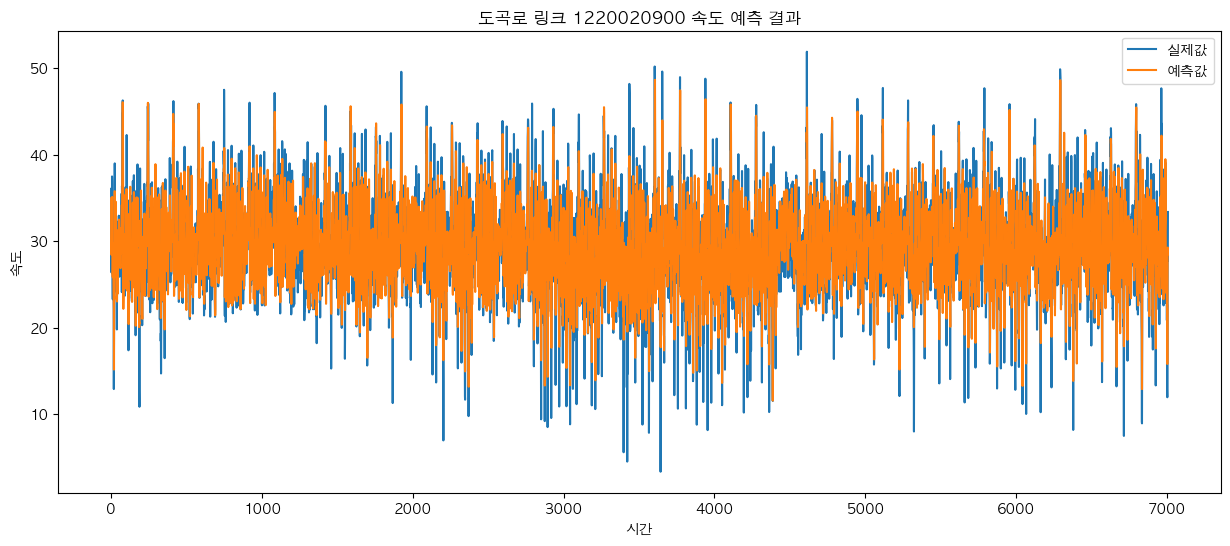

도곡로의 링크 1220020900 평가 결과:
Train RMSE: 2.952851189529056
Test RMSE: 2.9493034168213472
Train MAE: 2.2110349353462024
Test MAE: 2.2102860804353597
Train R2: 0.7047337664958293
Test R2: 0.708146972611879
Train Adjusted R2: 0.7047232325595645
Test Adjusted R2: 0.708105315028752
--------------------------------------------------

링크아이디 1220019100에 대한 분석
1/1 [==============================] - 0s 11ms/step


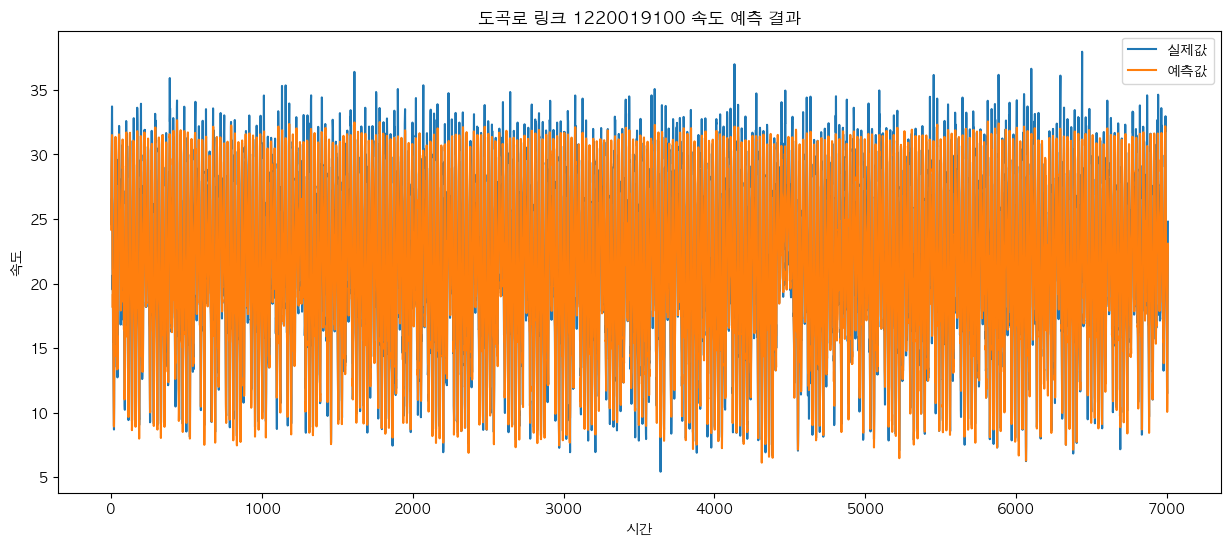

도곡로의 링크 1220019100 평가 결과:
Train RMSE: 1.781014718182498
Test RMSE: 1.5584954234787354
Train MAE: 1.3379090890684506
Test MAE: 1.2088888458768776
Train R2: 0.9420238526966108
Test R2: 0.9525329737930062
Train Adjusted R2: 0.942021784336022
Test Adjusted R2: 0.9525261985965735
--------------------------------------------------

링크아이디 1220025700에 대한 분석
1/1 [==============================] - 0s 12ms/step


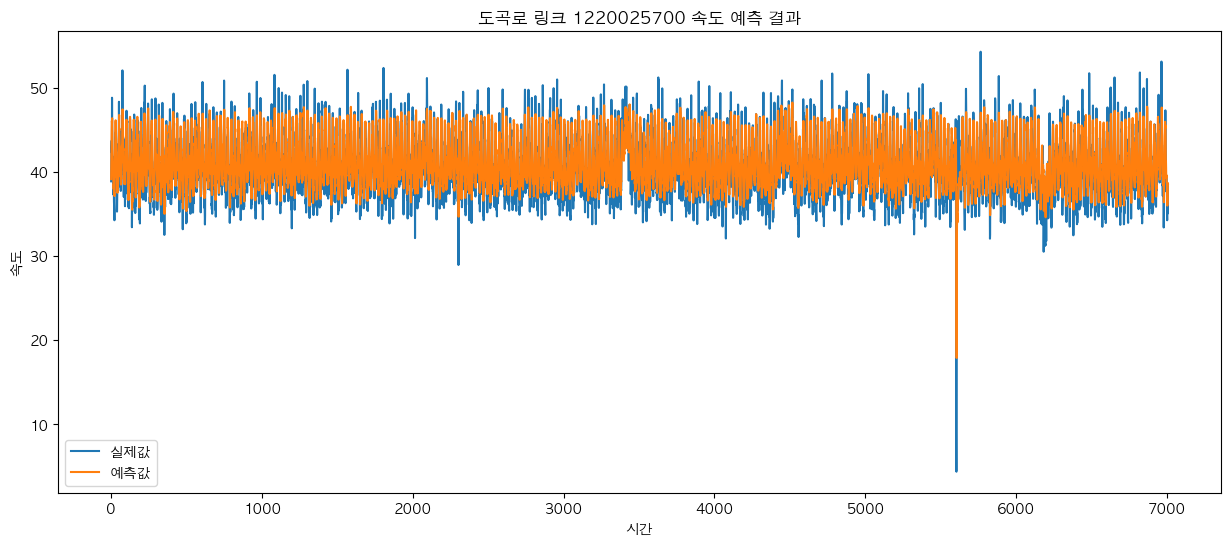

도곡로의 링크 1220025700 평가 결과:
Train RMSE: 2.1053741930611523
Test RMSE: 2.0958930239638067
Train MAE: 1.627773938658911
Test MAE: 1.6104397805161403
Train R2: 0.696191422268682
Test R2: 0.6451746430444089
Train Adjusted R2: 0.6961805835752204
Test Adjusted R2: 0.6451239971184946
--------------------------------------------------


In [10]:
results, predictions = train_lstm_model(dogog_df, '도곡로', target_col='속도')

### 모델 평가 지표 저장

In [12]:
# 결과를 DataFrame으로 변환
metrics_df = pd.DataFrame()

for link_id, data in results.items():
    metrics = pd.Series(data['metrics'], name=link_id)
    metrics_df = pd.concat([metrics_df, metrics.to_frame().T])

# 인덱스 이름을 '링크아이디'로 설정
metrics_df.index.name = '링크아이디'

# 컬럼 이름을 한글로 변경
metrics_df.columns = [
    '학습 RMSE', '테스트 RMSE',
    '학습 MAE', '테스트 MAE',
    '학습 R2', '테스트 R2',
    '학습 조정R2', '테스트 조정R2'
]

# 소수점 4자리로 반올림
metrics_df = metrics_df.round(3)

# 결과를 보기 좋게 정렬 (RMSE 기준)
metrics_df_sorted = metrics_df.sort_values('테스트 RMSE')


metrics_df_sorted.to_excel('도곡로_링크별_평가지표.xlsx')